In [98]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [99]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [100]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [101]:
# Drop the Unnamed: 0 and Clothing ID colunm
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [102]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [104]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

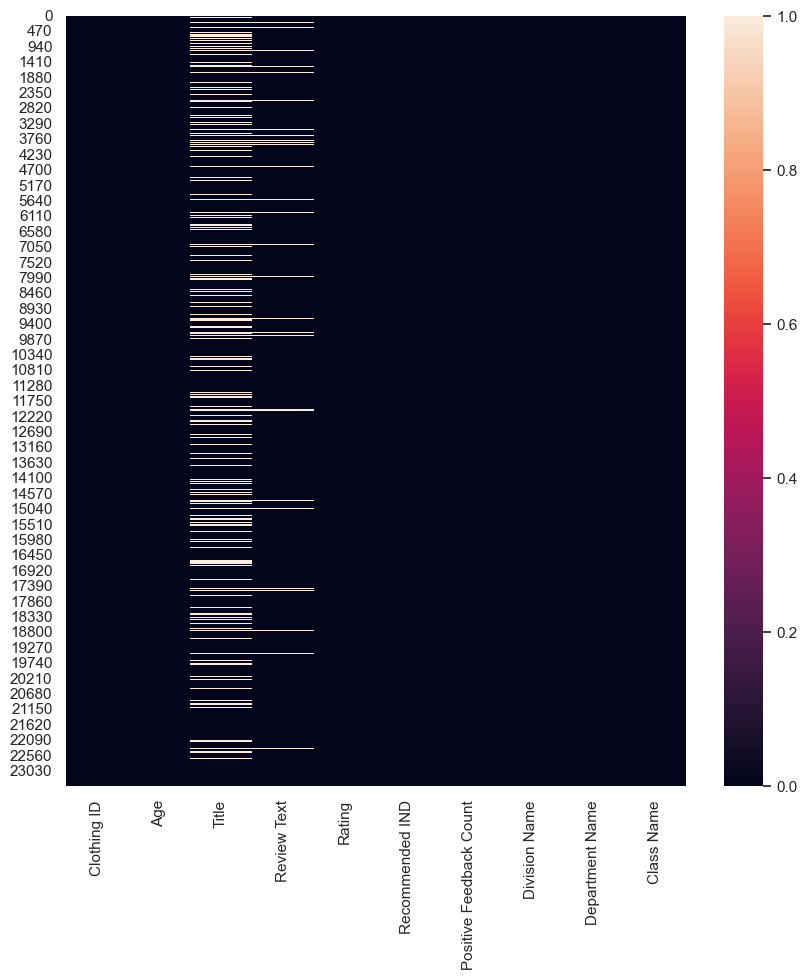

In [105]:
sns.heatmap(df.isnull());

In [106]:
df.dropna(inplace=True)

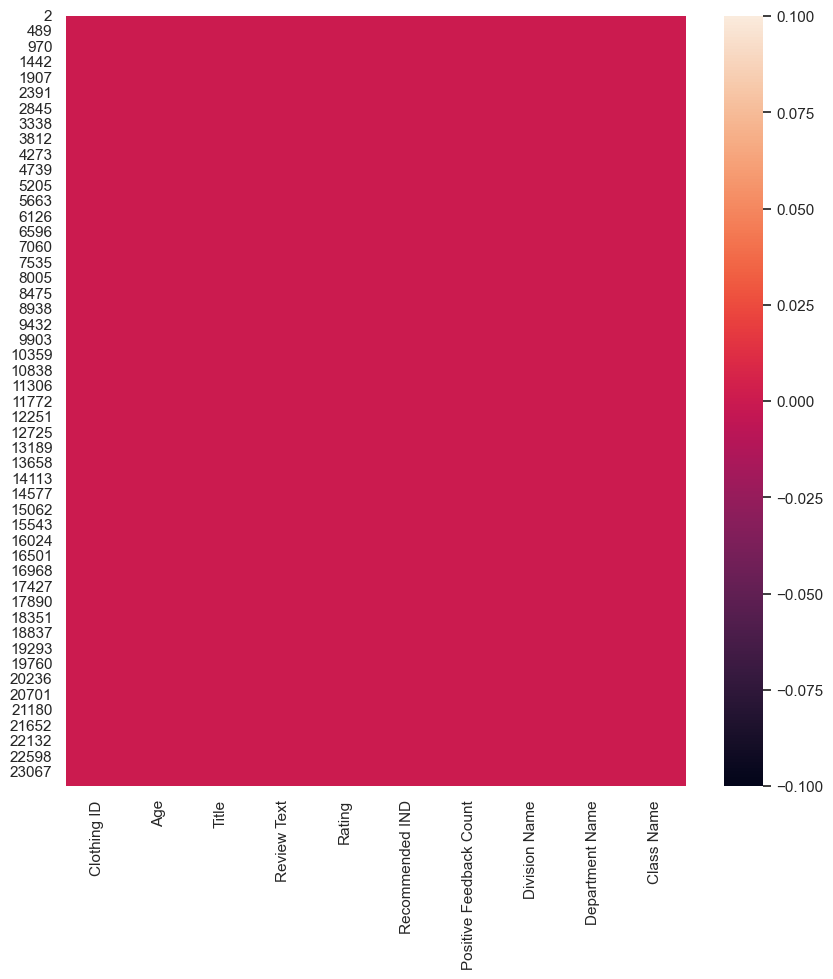

In [107]:
sns.heatmap(df.isnull());

In [108]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [109]:
df = df.rename(columns={'Clothing ID': 'Clothing_ID','Review Text': 'Review_Text','Recommended IND': 'Recommended_IND',
                            'Positive Feedback Count': 'Positive_Feedback_Count', 'Division Name': 'Division_Name',
                            'Department Name': 'Department_Name', 'Class Name': 'Class_Name'})

In [110]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [111]:
df.isnull().sum()

Clothing_ID                0
Age                        0
Title                      0
Review_Text                0
Rating                     0
Recommended_IND            0
Positive_Feedback_Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

In [112]:
df[~df.isnull()]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [113]:
df.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477
std,200.227528,12.258122,1.112224,0.385708,5.834285
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


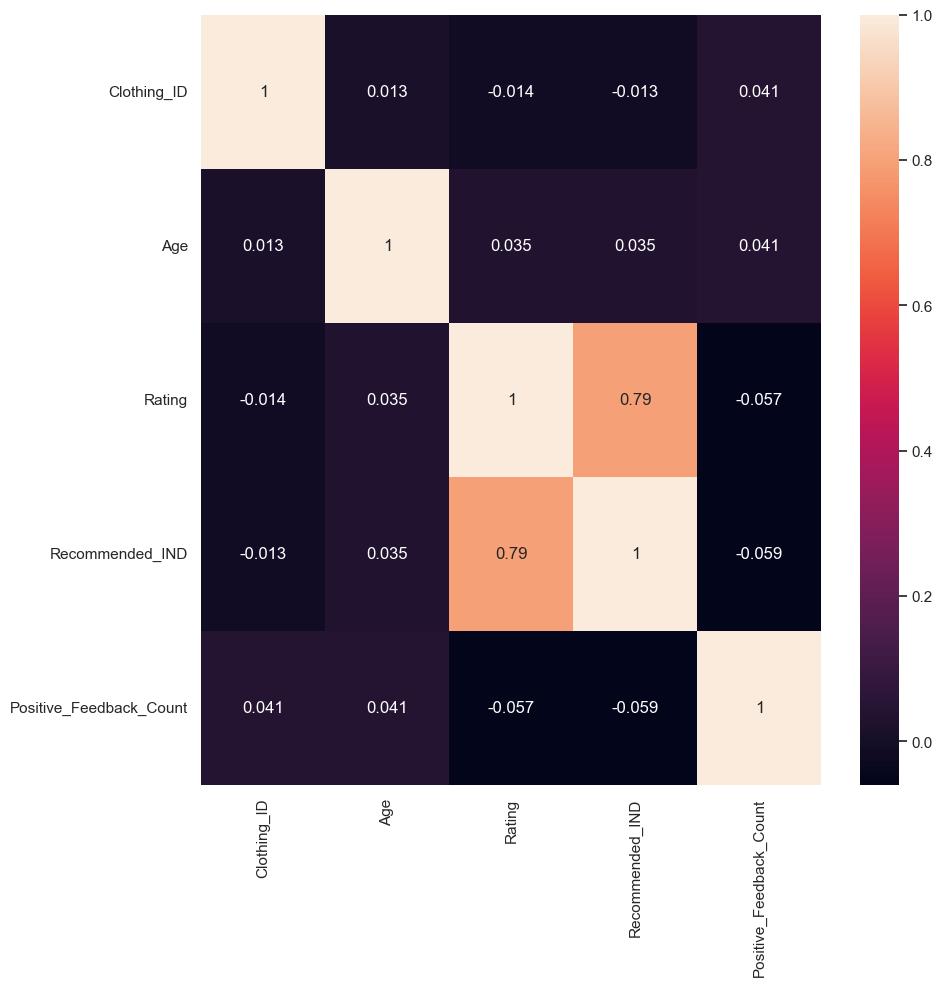

In [114]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=True)
correlations.round(2);

# Exploratory Data Analysis

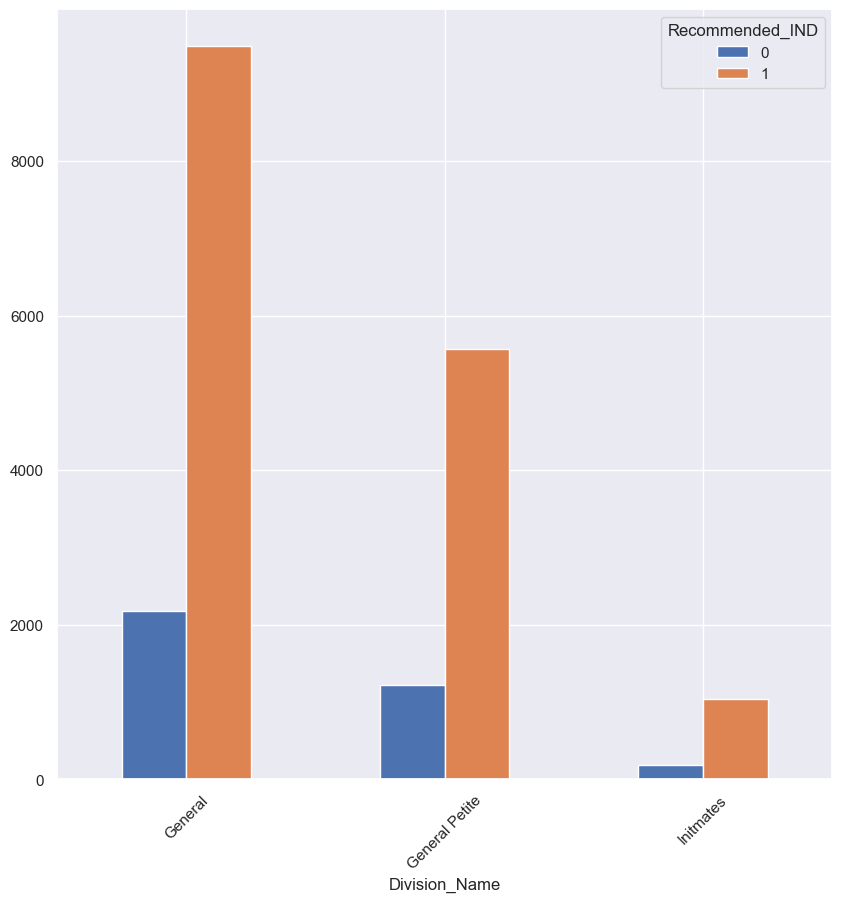

In [116]:
df.groupby(['Division_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=45);

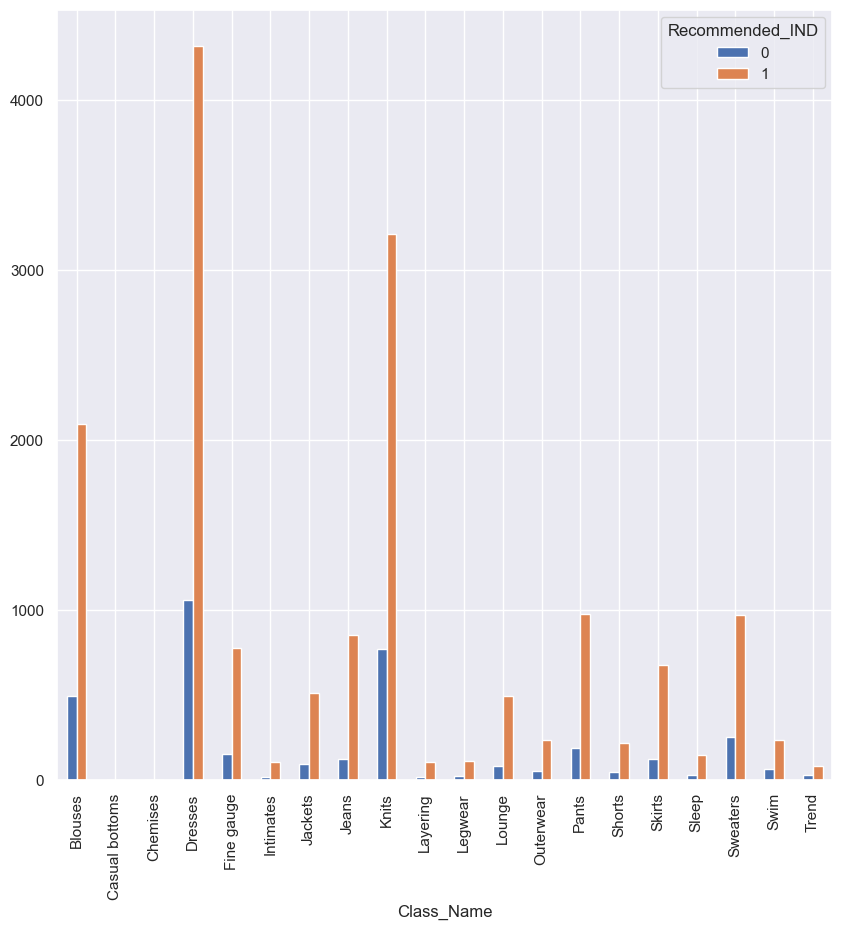

In [117]:
df.groupby(['Class_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=90);

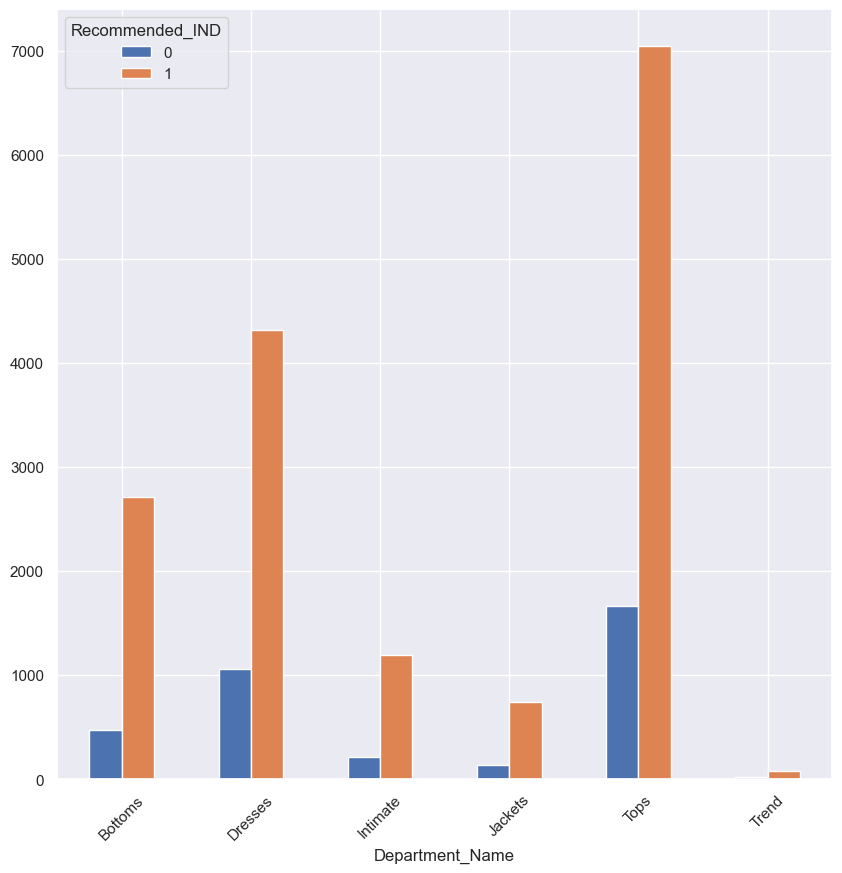

In [118]:
df.groupby(['Department_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=45);

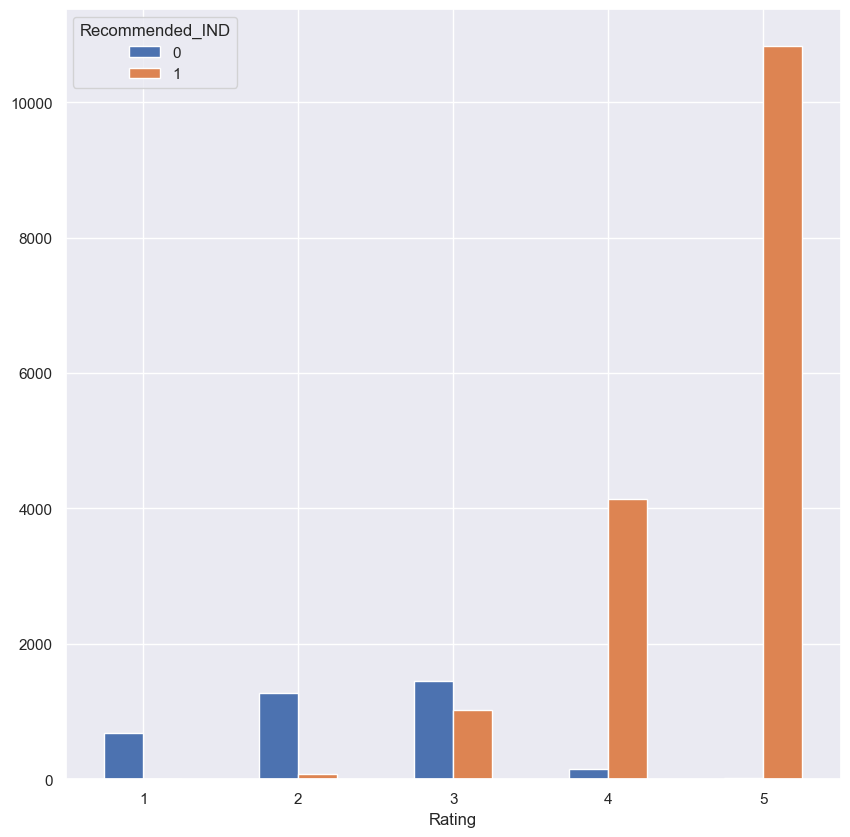

In [119]:
df.groupby(['Rating','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=0);

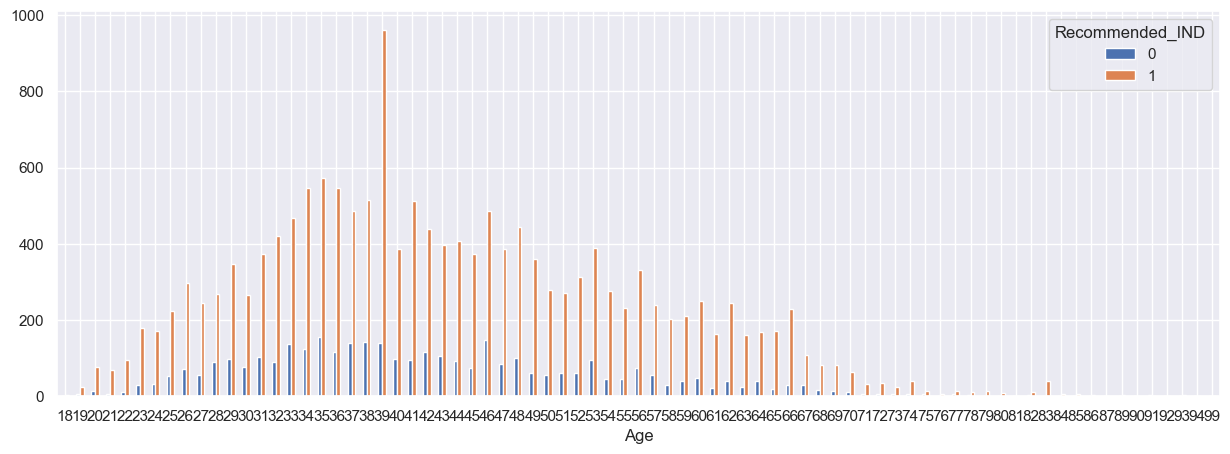

In [120]:
sns.set(rc={'figure.figsize':(15,5)})
df.groupby(['Age','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=0);

In [121]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x >= 2 else 0) 

In [122]:
posite = df[df['Rating'] == 1 ]
negative = df[df['Rating'] == 0]

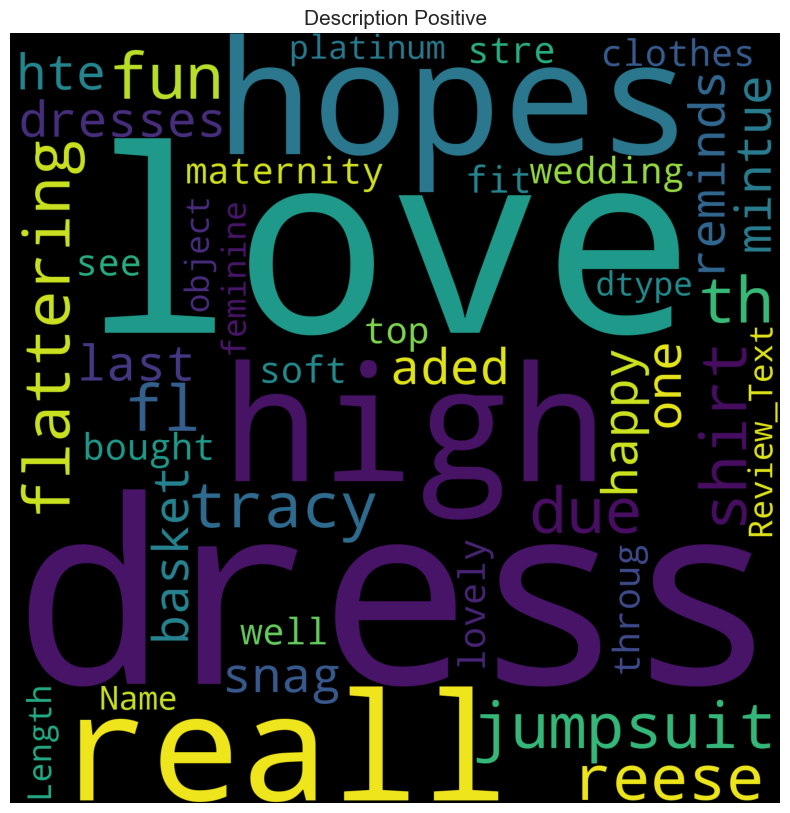

In [123]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(posite['Review_Text']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

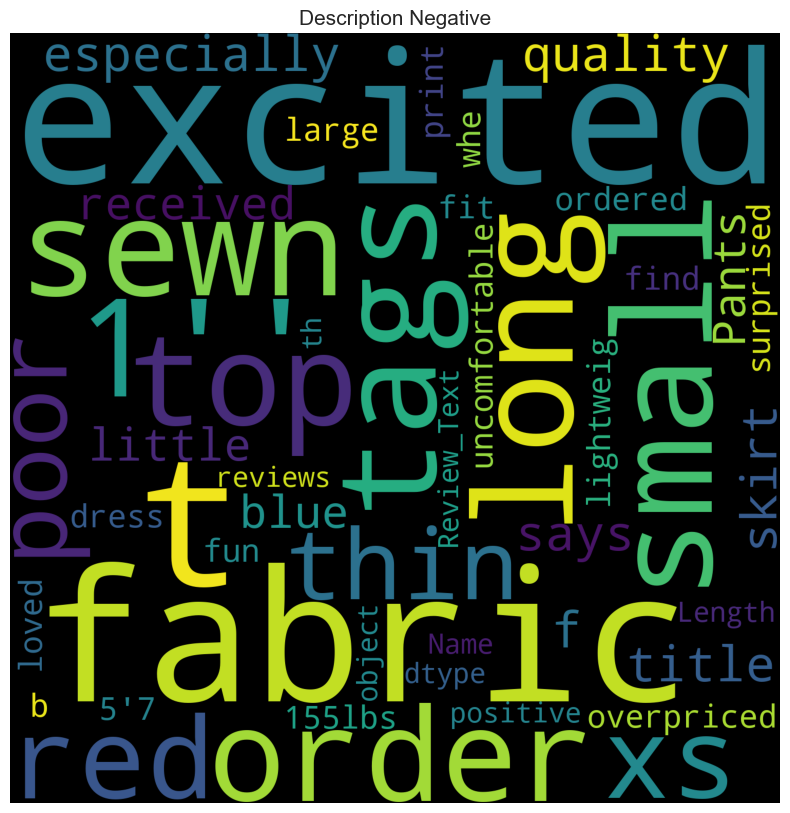

In [124]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(negative['Review_Text']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [125]:
df.head(2)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,1,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,1,0,General Petite,Bottoms,Pants


In [126]:
df = df.drop(['Clothing_ID','Age', 'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name', 'Department_Name', 'Class_Name'], axis = 1)

In [127]:
df.head(2)

,Title,Review_Text,Rating
2,Some major design flaws,I had such high hopes for this dress and reall...,1
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1


In [128]:
train, test = train_test_split(df, random_state = 0)

In [129]:
print( train.shape, test.shape)

(14746, 3) (4916, 3)


In [130]:
train.Rating.unique()

array([1, 0], dtype=int64)

In [131]:
df = train

In [132]:
df.head()

,Title,Review_Text,Rating
22055,Gorgeous..runs small,Beautiful airy well made blouse. very flatteri...,1
4963,"Fit was small at waist, large up top! odd spots!",I was so disappointed in this top. the fabric ...,1
5631,So cute!,This romper is so dang cute. i normally wear a...,1
18977,Beautiful top,Very intricate detail with stitching. love the...,1
7538,Beautiful and comfortable,Absolutely love this top! yes it runs big and ...,1


In [133]:
df.drop(['Title'], axis = 1, inplace=True)

In [134]:
df.head()

,Review_Text,Rating
22055,Beautiful airy well made blouse. very flatteri...,1
4963,I was so disappointed in this top. the fabric ...,1
5631,This romper is so dang cute. i normally wear a...,1
18977,Very intricate detail with stitching. love the...,1
7538,Absolutely love this top! yes it runs big and ...,1


In [135]:
X = df.iloc[:, 0].values

In [136]:
X

array(['Beautiful airy well made blouse. very flattering and feminine. i normally wear a size 8 and ordered a 10 per the other reviews and i am glad i did! the fit id perfect.',
       'I was so disappointed in this top. the fabric blend was too thick for summer. the cut was wide across the shoulders, and very narrow and short through the waist. add in the odd splashes in the print, and it spelled disaster.\r\n\r\nsize: i tend to run between small and xs. i ordered xs. i\'m 5\'5" tall, 135 lbs, 34d, 35-29-37, narrow across shoulders, with short arms and long torso.\r\n\r\nfit: the cut was so wide across my narrow shoulders that it looked baggy and felt odd. however, the sleeves didn\'t sl',
       "This romper is so dang cute. i normally wear a m/l or 10/12. i took a medium in this though either size would probably have worked depending how loose you like it. it's not too sheer and the shorts aren't too short (i'm 5'9). my only complaint is the front toe came off on one side as i was t

In [137]:
X.shape

(14746,)

In [138]:
X.shape

(14746,)

In [139]:
y = df.iloc[:, 1].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [140]:
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

In [141]:
X.shape

(2211,)

In [142]:
y.shape

(2211,)

In [143]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([  75, 2136], dtype=int64))

In [144]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [145]:
text = "@https://www.youtube.com/watch?v=4SUK0tkhmVg - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D"

In [146]:
text = clean_t(text)
text

' www.youtube.com watch?v SUK tkhmVg Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

In [147]:
import spacy

In [148]:
nlp = spacy.blank("en")

In [149]:
nlp

In [150]:
stop_words = sp.lang.en.STOP_WORDS

In [151]:
print(stop_words)

{'thereafter', 'someone', 'move', 'sixty', 'say', 'us', 'mostly', 'ourselves', '‘m', 'has', 'hers', 'being', 'mine', 'really', 'amount', 'regarding', 'than', 'amongst', 'themselves', 'four', 'whence', 'up', 'we', 'which', 'and', 'each', 'under', 'she', 'never', '‘re', 'beforehand', 'myself', 'last', 're', 'seem', 'moreover', 'they', 'above', 'two', 'by', 'go', 'more', 'next', 'his', 'below', 'when', 'per', 'hereafter', 'hereby', 'against', 'him', 'former', 'less', 'either', 'however', 'of', '’s', 'fifty', 'from', 'get', 'everyone', "'ve", 'with', 'toward', "'re", 'top', 'becoming', 'our', 'neither', 'quite', 'done', 'he', 'these', 'first', 'throughout', 'around', 'after', 'my', 'whole', 'many', 'take', "'m", 'well', 'anyway', 'off', 'fifteen', '’ve', 'himself', 'along', '‘s', 'among', 'both', "'ll", 'then', 'thereby', "'d", 'call', 'hundred', 'too', 'was', 'again', 'seeming', 'serious', 'upon', 'very', '‘d', 'although', 'whenever', 'herein', 'only', 'show', 'so', 'via', 'who', 'rather'

In [152]:
len(stop_words)

326

In [153]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [154]:
def clean_t2(t):
  tweet = t.lower()
  document = nlp(t)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [155]:
text2 = clean_t2(text)
text2

'  www.youtube.com watch?v SUK tkhmVg Awww s bummer You shoulda got David Carr Third Day D'

In [156]:
data_clean = [clean_t2(clean_t(t)) for t in X]

In [157]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

I m xl retailer tops purchased size xl fits nicely tight usually problems peplum blouses hitting oddly short waist fit beautifully like feel high quality fabric color green works red hair highly recommend blouse
This dress extremely flattering looks lot better worn hanger cut drapes nicely true size feet tall lbs xxsp fit perfectly bit short caution work office appropriate taller like hd paris dresses thin lined dress look lovely delicate jewelry bold statement piece casual lunch outing
I ve desperate swim cover covers arms fits nicely pretty feminine happy summer lets leggy t photos embroidery detail upper little mirrors sewn dots fun m paired jean shorts crotch visible slightly shorter appears pics
This need person stunning detailed embroidery gracefully oversized bohemian light airy dreamy kimono second saw white white classic ... cream embroidery beautiful kimono oversized m normally l xl plenty roomy s long nearly came knees m option petite d recommend shorter gals t wait pair w
D

In [158]:
data_labels = y

In [159]:
data_labels[data_labels == 4] = 1

In [160]:
data_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [161]:
np.unique(data_labels)

array([0, 1], dtype=int64)

In [162]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [163]:
tokenizer.vocab_size

6152

In [164]:
print(tokenizer.subwords)

['dress_', 'I_', 's_', 't_', 'size_', 'like_', 'love_', 'fit_', 'm_', 'wear_', 'great_', 'fabric_', 'color_', 'look_', 'This_', 'small_', 'ordered_', 'soft_', 'perfect_', 'flattering_', 'nice_', 'little_', 'looks_', 'bought_', 'length_', 'material_', 'fits_', 'bit_', 'shirt_', 'sweater_', 'comfortable_', 'large_', 'beautiful_', 'jeans_', 'petite_', 'got_', 'waist_', 'cute_', 'long_', 'colors_', 'think_', 'retailer_', 'short_', 'work_', 'xs_', 'store_', 'medium_', 'pretty_', 'didn_', ' ... ', 'quality_', 'skirt_', 'cut_', 'big_', 'usually_', 'black_', 'tried_', 'good_', 'lbs_', 'don_', 'pants_', 'right_', 'super_', 'true_', 'way_', 'runs_', 'wearing_', 'sleeves_', 'style_', 'online_', 'white_', 'model_', 'purchased_', 'feel_', 'perfectly_', 'summer_', 'looked_', 'high_', 'definitely_', 'sale_', 'tight_', 'person_', 'design_', 'fall_', 'blue_', 'jacket_', 'light_', 'The_', 'worn_', 've_', 'loved_', 'price_', 'gorgeous_', 'better_', 'thin_', 'going_', 'd_', 'want_', 'regular_', 'find_', '

In [165]:
ids = tokenizer.encode('i am happy')
ids

[1321, 5720, 1731]

In [166]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [167]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[2, 7, 474, 158, 8, 11, 179, 16, 134, 4719, 69, 6, 494, 2301, 1524, 69, 4659, 123, 10, 119, 5165, 4768, 1035, 670, 441, 4, 5123]
[2, 7, 40, 206, 4105, 4152, 27, 1008, 1879, 125, 170, 34, 493, 185, 1929, 186, 1172, 170, 61, 1354, 376, 42, 1508, 1979, 2103, 50, 92, 476, 184, 118, 1442, 799, 622, 435, 3, 424, 210, 2477]
[88, 4455, 193, 19, 147, 401, 1474, 125, 170, 34, 165, 1158, 39, 68, 151, 39, 1366, 1859, 17, 56, 714, 201, 85, 665, 1592]
[2, 314, 6, 172, 185, 24, 42, 251, 91, 299, 130, 16, 3, 45, 1368, 24, 3, 6, 185, 720, 145, 22, 304, 43, 211, 102, 260, 1444, 1753, 2856, 348, 2656, 622, 2289, 395, 297, 1782, 1527, 172, 4406]
[2, 24, 3857, 104, 637, 86, 1332, 658, 7, 210, 371, 791, 137, 18, 31, 1186]
[2, 36, 30, 356, 13, 252, 658, 259, 18, 83, 48, 6, 138, 26, 115, 323, 144, 25, 58, 6, 146, 489, 1530, 1943, 1099, 30, 1669, 60, 4, 41, 10, 723, 407, 232, 1415, 935, 3463, 2489, 1256, 1407]
[2, 49, 4, 757, 1469, 26, 175, 29, 26, 36, 336, 137, 3336, 5547, 141, 36, 43, 1151, 161, 3, 31, 114, 

In [168]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

57

In [169]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,value = 0,padding = 'post',maxlen=max_len)

In [170]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[  88  108   21   72    6  123  162 1186    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[   2  362 1501   23  202  731   58   51   20    8    6   16  442  111
  231   14  524   67   84  188  640 1652    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[   2 1453    7    1   66  229   16    6  217  311    5  164  344  105
  360    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[  15    1   17  384  334  971  234  316  330  274 1573  143   12   93
    8  290  298   10  399   53   12  160   48 1674  111 

In [171]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,data_labels,test_size=0.3,
stratify = data_labels)

In [172]:
train_inputs[0]

array([   2,    7,   30,    3,  393,    6,  193,  393,    6,  443, 1172,
        165,   71,   39,  305,  175,  167,    9,   59,   45,    8,    7,
        928, 1531,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [173]:
train_inputs.shape

(1547, 57)

In [174]:
train_labels.shape

(1547,)

In [175]:
test_inputs.shape

(664, 57)

In [176]:
test_labels.shape

(664,)

In [177]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)
    self.embedding = layers.Embedding(vocab_size, emb_dim)
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')
    self.pool = layers.GlobalMaxPool1D()
    
#estrutura da rede neural
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

In [178]:
vocab_size = tokenizer.vocab_size
vocab_size

6152

In [179]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [180]:
dropout_rate = 0.2
nb_epochs = 5  

In [181]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [182]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
#ckpt_manager.save()

Epoch 1/5
22/22 [==============================] - 14s 332ms/step - loss: 0.2600 - accuracy: 0.9368 - val_loss: 0.2587 - val_accuracy: 0.9484
Epoch 2/5
22/22 [==============================] - 6s 286ms/step - loss: 0.1261 - accuracy: 0.9684 - val_loss: 0.1989 - val_accuracy: 0.9484
Epoch 3/5
22/22 [==============================] - 6s 283ms/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 0.2120 - val_accuracy: 0.9484
Epoch 4/5
22/22 [==============================] - 6s 283ms/step - loss: 0.0767 - accuracy: 0.9684 - val_loss: 0.2233 - val_accuracy: 0.9484
Epoch 5/5
22/22 [==============================] - 6s 287ms/step - loss: 0.0490 - accuracy: 0.9684 - val_loss: 0.2631 - val_accuracy: 0.9484


In [184]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

11/11 [==============================] - 1s 72ms/step - loss: 0.1796 - accuracy: 0.9654
[0.17962881922721863, 0.9653614163398743]


In [185]:
y_pred_test = Dcnn.predict(test_inputs)

21/21 [==============================] - 1s 42ms/step


In [186]:
y_pred_test

array([[0.95528513],
       [0.9952109 ],
       [0.98675895],
       [0.99670756],
       [0.99775827],
       [0.9913554 ],
       [0.99832296],
       [0.9964225 ],
       [0.999304  ],
       [0.9950239 ],
       [0.97626686],
       [0.9972141 ],
       [0.99878836],
       [0.9988922 ],
       [0.99888706],
       [0.9926766 ],
       [0.9776344 ],
       [0.9976302 ],
       [0.9976198 ],
       [0.9997266 ],
       [0.99503744],
       [0.9818551 ],
       [0.9985138 ],
       [0.99951726],
       [0.97547156],
       [0.99993694],
       [0.98863286],
       [0.99784   ],
       [0.9605194 ],
       [0.9996883 ],
       [0.9997751 ],
       [0.9885688 ],
       [0.9992145 ],
       [0.9948806 ],
       [0.99906737],
       [0.99181485],
       [0.9989444 ],
       [0.99992836],
       [0.9994123 ],
       [0.98923224],
       [0.9972298 ],
       [0.9934384 ],
       [0.9499976 ],
       [0.99805576],
       [0.9993934 ],
       [0.9995336 ],
       [0.99427617],
       [0.999

In [187]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [188]:
test_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [189]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[  0,  23],
       [  0, 641]], dtype=int64)

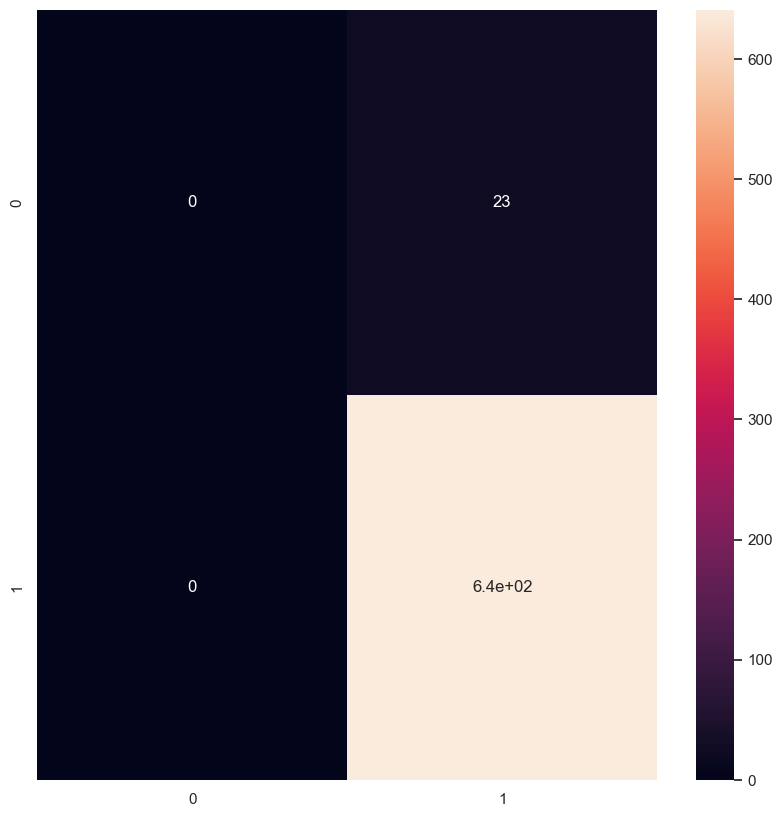

In [190]:
sns.heatmap(cm, annot=True);

In [194]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

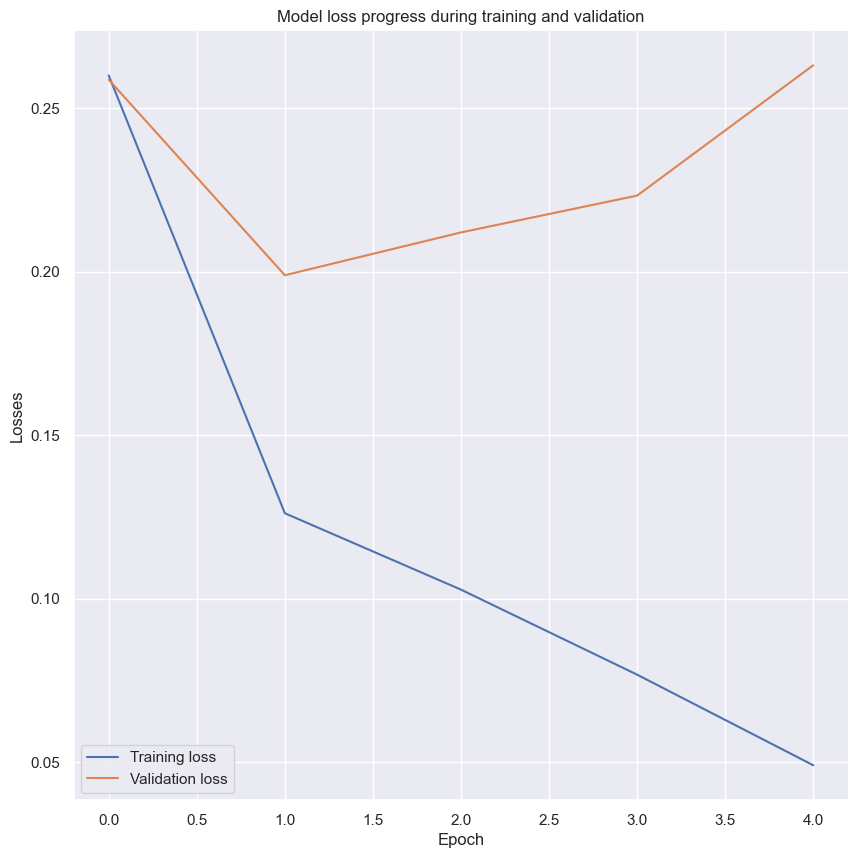

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss']);

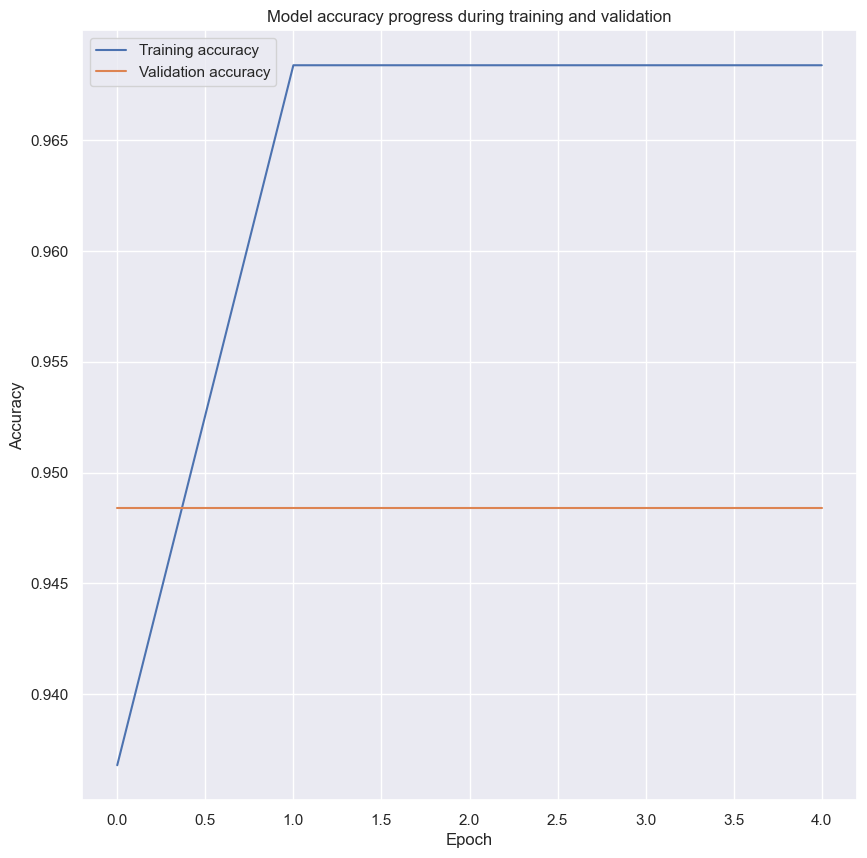

In [196]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

I attempted to use the "Recommended" attribute at the beginning of the study, which has values of 0 and 1. I thought that if a person recommends something, there would be positive comments; otherwise, it would be negative. However, the algorithm's prediction based on this attribute to identify negative sentences wasn't very conclusive.

With an unsatisfactory result from the "Recommended" attribute, I decided to use the "Rating" attribute in the database for the algorithm's development. This attribute has ratings from 1 to 5, and I used it as parameters where ratings greater than or equal to 2 would be positive; otherwise, they would be negative. The result was satisfactory, as we can see, the success level was more satisfactory.

The change was also noticeable in the word cloud. When a customer is given the option to rate with scores, there's a more subjective side to the comments - a feeling. Customers need to think more about how they felt about the product, whether they were satisfied or not. Since they can't give a score of 0, they end up giving a 1, which is the minimum. Having to consider how they felt about the product encourages them to express their feelings and reasons behind the score through comments.

The fact that someone recommends or not doesn't necessarily mean they made a positive or negative comment; they simply didn't recommend it. It's just two options: recommend or not recommend, objectively!